## Example Logistic Regression MSE

Zunächst konfigurieren wir *Torch*

In [1]:
from matplotlib import pyplot as plt
import torch
import torch.nn as nn

dtype = torch.float
device = torch.device("cpu")
# device = torch.device("cuda:0") # Uncomment this to run on GPU

Dann konstruieren wir hier Zufallsdaten und legen die Dimensionen unseres Problems fest. In diesem Beispiel bauen wir uns einen Eingabe-Datensatz mit 64 Datenpunkten und 1000 Features. Die Ausgabe, das Targetvalue ist 1-dimensional und Bernoulli-verteilt.

In [2]:
m = torch.distributions.bernoulli.Bernoulli(torch.tensor([0.3]))

In [3]:
# N sind die Anzahl der Datenpunkte 
# D_in ist die Input-Dimension
# D_out ist die Output-Dimension
N, D_in, D_out = 64, 1000, 1

# Zufällige input- und output-Daten (Labels)
x = torch.randn(N, D_in, device=device, dtype=dtype)
y = m.sample((N,)) # 30% chance 1; 70% chance 0

Wir definieren unser modell mit Hilfe des 'nn' Packetes

In [4]:
# Logistic regression model
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, D_out),
    torch.nn.Sigmoid()
)

Dannach legen wir ein Fehlermaß und einen Optimierer fest, sowie die entsprechenden Hyperparameter

In [5]:
# Hyper-parameters 
learning_rate = 0.01

In [6]:
# Loss and optimizer
# nn.CrossEntropyLoss() computes softmax internally

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate) 

Wenn wir das haben, dann können wir unser Modell trainieren.

Interativ machen wir zunächst eine Vorhersage, dann berechnen wir den Fehler und aktualisieren die Gewichte mit Hilfe der Backpropagation. Diese Schritte wiederholen wir solange, bis der Fehler klein genug ist...

In [7]:
loss_hist = []

In [8]:
# Train
for t in range(1000):
    # Berechne die Vorhersage (foward step)
    outputs = model(x) # mini-batch verwenden, falls es für IMDB zu lange dauert
    
    # Berechne den Fehler (Ausgabe des Fehlers alle 100 Iterationen)
    loss = criterion(outputs, y)
    
    # Berechne die Gradienten und Aktualisiere die Gewichte (backward step)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Berechne den Fehler (Ausgabe des Fehlers alle 100 Iterationen)
    if t % 50 == 0:
        loss_hist.append(loss.item())
        print(t, loss.item())

0 0.2577028274536133
50 0.05885036289691925
100 0.027527358382940292
150 0.017210757359862328
200 0.0123132998123765
250 0.009507089853286743
300 0.007706061005592346
350 0.006459417287260294
400 0.005548746325075626
450 0.00485615199431777
500 0.00431269034743309
550 0.003875486785545945
600 0.0035165396984666586
650 0.003216818440705538
700 0.002962956903502345
750 0.0027452996000647545
800 0.002556703519076109
850 0.002391779562458396
900 0.002246379852294922
950 0.002117270603775978


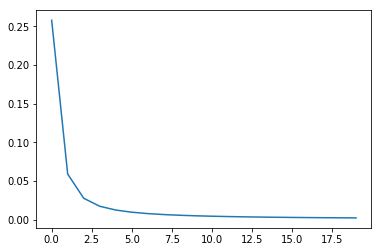

In [9]:
plt.plot(loss_hist);

Aufgabe:
- Erweitert euer Projekt um die logistische Regression in Torch
- Wendet die Logistische Regression auf den IMDB-Datensatz an
- Speichert das Model nach dem Training
- Ladet und testet das Modell auf dem Test-Datensatz